## Name                    : Ritik Sharma
## Register Number : 23MDT0029
## Course Name       : Deep Learning-Laboratory Course
## Course Code        : MAT6007

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10 as cf10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

In [4]:
# Data normalization
max_pixel_value = 255

# Images are already in RGB format, so no need to reshape to grayscale
train_images = train_images.astype('float32') / max_pixel_value
test_images = test_images.astype('float32') / max_pixel_value

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
# One-hot encode the labels
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [7]:
# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 96
FILTER2_SIZE = 256
FILTER3_SIZE = 384
FILTER4_SIZE = 384
FILTER5_SIZE = 256
FILTER_SHAPE1 = (11, 11)
FILTER_SHAPE2 = (5, 5)
FILTER_SHAPE3 = (3, 3)
POOL_SHAPE = (3, 3)
POOL_STRIDE = (2, 2)
FULLY_CONNECT_NUM1 = 4096
FULLY_CONNECT_NUM2 = 4096
NUM_CLASSES = len(class_names)

In [8]:
# Define the AlexNet architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE1, strides=(4, 4), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SHAPE, strides=POOL_STRIDE, padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE2,strides = (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SHAPE, strides=POOL_STRIDE, padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(FILTER3_SIZE, FILTER_SHAPE3,strides = (1, 1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(FILTER4_SIZE, FILTER_SHAPE3,strides = (1, 1), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(FILTER5_SIZE, FILTER_SHAPE3,strides = (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SHAPE, strides=POOL_STRIDE, padding='same'))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(FULLY_CONNECT_NUM1, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer 2
model.add(Dense(FULLY_CONNECT_NUM2, activation='relu'))
model.add(Dropout(0.5))

# Output layer (for 10 classes)
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\sharm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,624,586 (82.49 MB)

 Trainable params: 21,623,370 (82.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [10]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 5

METRICS = metrics=['accuracy', 
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels), verbose=1)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 577s 362ms/step - accuracy: 0.2155 - loss: 2.1475 - precision: 0.3337 - recall: 0.0317 - val_accuracy: 0.3136 - val_loss: 1.9098 - val_precision: 0.4967 - val_recall: 0.1050
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 564s 361ms/step - accuracy: 0.3422 - loss: 1.7372 - precision: 0.5012 - recall: 0.1064 - val_accuracy: 0.3886 - val_loss: 1.6310 - val_precision: 0.6532 - val_recall: 0.0535
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 636s 407ms/step - accuracy: 0.4179 - loss: 1.5621 - precision: 0.5849 - recall: 0.1947 - val_accuracy: 0.4271 - val_loss: 1.6099 - val_precision: 0.6477 - val_recall: 0.1677
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 538s 344ms/step - accuracy: 0.4756 - loss: 1.4372 - precision: 0.6384 - recall: 0.2717 - val_accuracy: 0.3635 - val_loss: 1.8158 - val_precision: 0.6176 - val_recall: 0.1856
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 532s 341ms/step - accuracy: 0.5211 - loss: 1.3440 - precision: 0.6751 - recall: 0.3316 - val_accura

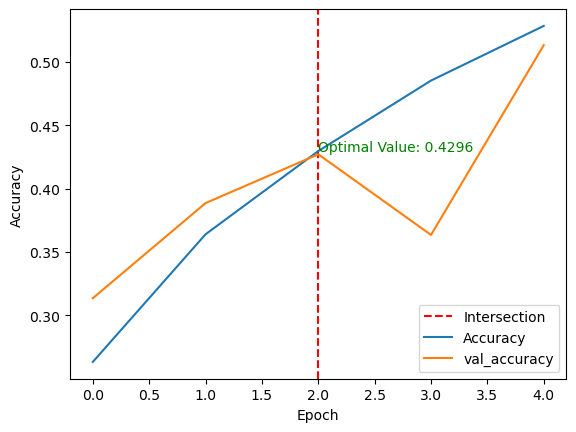

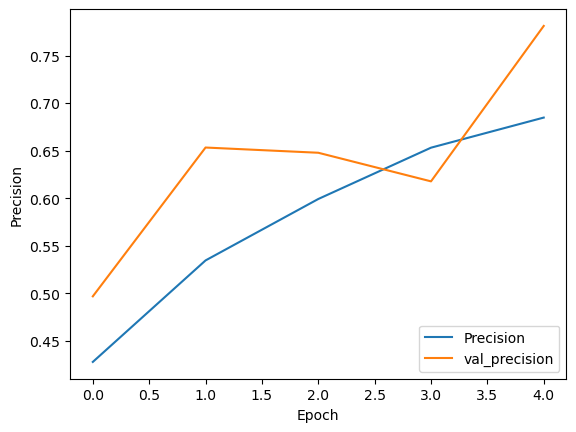

In [12]:
def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    
    # Find where the training and validation curves intersect within a tolerance
    intersection_indices = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()
    
    # If an intersection exists, plot it, otherwise skip
    if intersection_indices.size > 0:
        intersection_idx = intersection_indices[0]
        intersection_value = train_perf[intersection_idx]
        plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
        plt.annotate(f'Optimal Value: {intersection_value:.4f}',
                     xy=(intersection_idx, intersection_value),
                     xycoords='data',
                     fontsize=10,
                     color='green')

    # Plot training and validation performance curves
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label='val_' + str(metric))
    
    # Set plot labels and legends
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')
    plt.show()

# Call the function for accuracy and precision
show_performance_curve(training_history, 'accuracy', 'Accuracy')
show_performance_curve(training_history, 'precision', 'Precision')

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


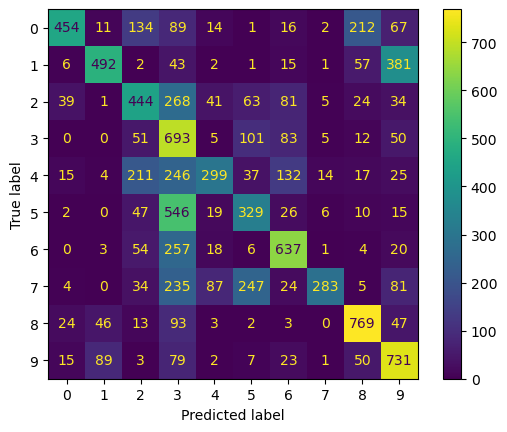

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_images)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()